In [1]:
# Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Preprocessing and Modeling
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Evaluation and Metrics
import statsmodels.api as SM
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Fixing display styling for Jupyter Notebook
from IPython.display import display, HTML
display(HTML('<style>.container { width:90% !important; }</style>'))


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv(r'C:\Users\Sidhesh Salunke\Downloads\combined_customer_sales_marketing_data.csv')
df

CustomerID ProductID  QuantitySold  SalePrice  DateOfSale  Channel  \
0      CUST0551   PROD072             2     458.60  2024-11-30  Offline   
1      CUST0799   PROD061             4     285.13  2024-09-01  Offline   
2      CUST0415   PROD093             4      85.43  2024-11-26   Online   
3      CUST0217   PROD077             3     190.18  2024-09-15   Online   
4      CUST0958   PROD007             2     554.38  2025-02-27   Online   
...         ...       ...           ...        ...         ...      ...   
1995   CUST0803   PROD070             2      19.60  2025-06-03  Offline   
1996   CUST0597   PROD035             2     721.63  2025-01-11   Online   
1997   CUST0978   PROD031             2     579.34  2024-03-27   Online   
1998   CUST0461   PROD021             3     697.73  2025-06-03   Online   
1999   CUST0695   PROD075             4     929.60  2024-08-20  Offline   

      ReturnStatus  Age  Gender Region  ...     Category  SubCategory  \
0         Returned   52   Other  North  ...  Electronics       Phones   
1     Not Returned   69   Other  South  ...        Books  Non-Fiction   
2         Returned   35    Male  North  ...       Beauty     Skincare   
3         Returned   41   Other   East  ...        Books  Non-Fiction   
4     Not Returned   40    Male  South  ...     Clothing      Jackets   
...            ...  ...     ...    ...  ...          ...          ...   
1995      Returned   32   Other  North  ...        Books       Comics   
1996      Returned   58   Other  North  ...  Electronics      Laptops   
1997  Not Returned   54  Female  North  ...  Electronics      Cameras   
1998  Not Returned   30    Male   West  ...     Clothing        Pants   
1999  Not Returned   42  Female  South  ...         Home      Kitchen   

     ManufacturingCost SellingPrice  Discount  Stock  CampaignID  \
0               302.12       458.60         0    170     CAMP024   
1               149.78       285.13         0     91     CAMP002   
2                69.22        85.43        15    162     CAMP046   
3               139.46       190.18        20    189     CAMP025   
4               392.07       554.38         0    110     CAMP048   
...                ...          ...       ...    ...         ...   
1995             14.65        19.60         0    150     CAMP044   
1996            446.77       721.63        20    139     CAMP022   
1997            462.43       579.34        20     72     CAMP040   
1998            455.74       697.73         5    125     CAMP050   
1999            474.28       929.60        20    117     CAMP027   

            Medium ConversionRate CustomerReach  
0            Email           0.05          8351  
1            Radio           0.17          3223  
2            Email           0.23           700  
3            Print           0.03          8674  
4               TV           0.13          6770  
...            ...            ...           ...  
1995         Radio           0.12          8434  
1996         Print           0.16          2200  
1997         Email           0.11          1738  
1998  Social Media           0.10          7198  
1999  Social Media           0.26           359  

[2000 rows x 22 columns]

In [4]:
df.head()

CustomerID ProductID  QuantitySold  SalePrice  DateOfSale  Channel  \
0   CUST0551   PROD072             2     458.60  2024-11-30  Offline   
1   CUST0799   PROD061             4     285.13  2024-09-01  Offline   
2   CUST0415   PROD093             4      85.43  2024-11-26   Online   
3   CUST0217   PROD077             3     190.18  2024-09-15   Online   
4   CUST0958   PROD007             2     554.38  2025-02-27   Online   

   ReturnStatus  Age Gender Region  ...     Category  SubCategory  \
0      Returned   52  Other  North  ...  Electronics       Phones   
1  Not Returned   69  Other  South  ...        Books  Non-Fiction   
2      Returned   35   Male  North  ...       Beauty     Skincare   
3      Returned   41  Other   East  ...        Books  Non-Fiction   
4  Not Returned   40   Male  South  ...     Clothing      Jackets   

  ManufacturingCost SellingPrice  Discount  Stock  CampaignID  Medium  \
0            302.12       458.60         0    170     CAMP024   Email   
1            149.78       285.13         0     91     CAMP002   Radio   
2             69.22        85.43        15    162     CAMP046   Email   
3            139.46       190.18        20    189     CAMP025   Print   
4            392.07       554.38         0    110     CAMP048      TV   

  ConversionRate CustomerReach  
0           0.05          8351  
1           0.17          3223  
2           0.23           700  
3           0.03          8674  
4           0.13          6770  

[5 rows x 22 columns]

In [5]:
df.tail()



CustomerID ProductID  QuantitySold  SalePrice  DateOfSale  Channel  \
1995   CUST0803   PROD070             2      19.60  2025-06-03  Offline   
1996   CUST0597   PROD035             2     721.63  2025-01-11   Online   
1997   CUST0978   PROD031             2     579.34  2024-03-27   Online   
1998   CUST0461   PROD021             3     697.73  2025-06-03   Online   
1999   CUST0695   PROD075             4     929.60  2024-08-20  Offline   

      ReturnStatus  Age  Gender Region  ...     Category SubCategory  \
1995      Returned   32   Other  North  ...        Books      Comics   
1996      Returned   58   Other  North  ...  Electronics     Laptops   
1997  Not Returned   54  Female  North  ...  Electronics     Cameras   
1998  Not Returned   30    Male   West  ...     Clothing       Pants   
1999  Not Returned   42  Female  South  ...         Home     Kitchen   

     ManufacturingCost SellingPrice  Discount  Stock  CampaignID  \
1995             14.65        19.60         0    150     CAMP044   
1996            446.77       721.63        20    139     CAMP022   
1997            462.43       579.34        20     72     CAMP040   
1998            455.74       697.73         5    125     CAMP050   
1999            474.28       929.60        20    117     CAMP027   

            Medium ConversionRate CustomerReach  
1995         Radio           0.12          8434  
1996         Print           0.16          2200  
1997         Email           0.11          1738  
1998  Social Media           0.10          7198  
1999  Social Media           0.26           359  

[5 rows x 22 columns]

In [6]:
df.shape


(2000, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         2000 non-null   object 
 1   ProductID          2000 non-null   object 
 2   QuantitySold       2000 non-null   int64  
 3   SalePrice          2000 non-null   float64
 4   DateOfSale         2000 non-null   object 
 5   Channel            2000 non-null   object 
 6   ReturnStatus       2000 non-null   object 
 7   Age                2000 non-null   int64  
 8   Gender             2000 non-null   object 
 9   Region             2000 non-null   object 
 10  Occupation         2000 non-null   object 
 11  LoyaltyTier        2000 non-null   object 
 12  Category           2000 non-null   object 
 13  SubCategory        2000 non-null   object 
 14  ManufacturingCost  2000 non-null   float64
 15  SellingPrice       2000 non-null   float64
 16  Discount           2000 

In [8]:
duplicates=df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [CustomerID, ProductID, QuantitySold, SalePrice, DateOfSale, Channel, ReturnStatus, Age, Gender, Region, Occupation, LoyaltyTier, Category, SubCategory, ManufacturingCost, SellingPrice, Discount, Stock, CampaignID, Medium, ConversionRate, CustomerReach]
Index: []

[0 rows x 22 columns]


In [9]:
#checking for no. of unique values
# Checking for the number of unique values in each column
unique_counts = df.nunique()

# Displaying the number of unique values for each column
print(unique_counts)
 ##  Complete the code to check unique entries in the data

CustomerID           881
ProductID            100
QuantitySold           4
SalePrice            100
DateOfSale           688
Channel                2
ReturnStatus           2
Age                   52
Gender                 3
Region                 4
Occupation             6
LoyaltyTier            4
Category               5
SubCategory           15
ManufacturingCost    100
SellingPrice         100
Discount               5
Stock                 83
CampaignID            50
Medium                 5
ConversionRate        24
CustomerReach         50
dtype: int64


In [10]:
df.describe().T

count        mean          std     min      25%      50%  \
QuantitySold       2000.0     2.53000     1.136990    1.00     2.00     3.00   
SalePrice          2000.0   430.46993   236.910838   10.90   258.77   431.54   
Age                2000.0    44.22550    14.960132   18.00    32.00    45.00   
ManufacturingCost  2000.0   271.51075   140.659073    8.08   149.78   288.51   
SellingPrice       2000.0   430.46993   236.910838   10.90   258.77   431.54   
Discount           2000.0    10.12750     7.589469    0.00     5.00    10.00   
Stock              2000.0   107.78950    55.319565   11.00    60.00   117.00   
ConversionRate     2000.0     0.16023     0.073546    0.03     0.09     0.15   
CustomerReach      2000.0  4679.33750  2881.167377  359.00  1925.00  4431.00   

                       75%      max  
QuantitySold          4.00     4.00  
SalePrice           612.26   974.53  
Age                  57.00    69.00  
ManufacturingCost   389.18   490.72  
SellingPrice        612.26   974.53  
Discount             15.00    20.00  
Stock               153.00   196.00  
ConversionRate        0.23     0.30  
CustomerReach      7042.00  9694.00

In [11]:
df.describe()

QuantitySold    SalePrice          Age  ManufacturingCost  \
count    2000.00000  2000.000000  2000.000000        2000.000000   
mean        2.53000   430.469930    44.225500         271.510750   
std         1.13699   236.910838    14.960132         140.659073   
min         1.00000    10.900000    18.000000           8.080000   
25%         2.00000   258.770000    32.000000         149.780000   
50%         3.00000   431.540000    45.000000         288.510000   
75%         4.00000   612.260000    57.000000         389.180000   
max         4.00000   974.530000    69.000000         490.720000   

       SellingPrice     Discount        Stock  ConversionRate  CustomerReach  
count   2000.000000  2000.000000  2000.000000     2000.000000    2000.000000  
mean     430.469930    10.127500   107.789500        0.160230    4679.337500  
std      236.910838     7.589469    55.319565        0.073546    2881.167377  
min       10.900000     0.000000    11.000000        0.030000     359.000000  
25%      258.770000     5.000000    60.000000        0.090000    1925.000000  
50%      431.540000    10.000000   117.000000        0.150000    4431.000000  
75%      612.260000    15.000000   153.000000        0.230000    7042.000000  
max      974.530000    20.000000   196.000000        0.300000    9694.000000

In [12]:
print(df.isnull().sum())


CustomerID           0
ProductID            0
QuantitySold         0
SalePrice            0
DateOfSale           0
Channel              0
ReturnStatus         0
Age                  0
Gender               0
Region               0
Occupation           0
LoyaltyTier          0
Category             0
SubCategory          0
ManufacturingCost    0
SellingPrice         0
Discount             0
Stock                0
CampaignID           0
Medium               0
ConversionRate       0
CustomerReach        0
dtype: int64


In [13]:
df_copy = df.copy()

# Select numeric columns only
numeric_cols = df_copy.select_dtypes(include=[np.number]).columns

# Z-score to find outliers
z_scores = np.abs(stats.zscore(df_copy[numeric_cols]))
outliers = (z_scores > 3)

# filling outliers with NaN values 
df_copy[numeric_cols] = df_copy[numeric_cols].mask(outliers)

# Apply IterativeImputer only on numeric columns
imputer = IterativeImputer(random_state=0)
df_copy[numeric_cols] = imputer.fit_transform(df_copy[numeric_cols])

In [14]:

# Select numeric columns only for imputation
numeric_cols = df.select_dtypes(include=[np.number])

# Initialize the imputer correctly
imputer = IterativeImputer(random_state=0, max_iter=10)

# Fit and transform the data
imputed_array = imputer.fit_transform(numeric_cols)

# Convert back to DataFrame
imputed_df = pd.DataFrame(imputed_array, columns=numeric_cols.columns)

# Replace the imputed columns back into the original DataFrame
df[numeric_cols.columns] = imputed_df



In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_df)

In [16]:
# Replace string labels with integers (adjust as needed)
df['ReturnStatus'] = df['ReturnStatus'].map({'Returned': 1, 'Not Returned': 0})

# Now convert to int (after mapping)
df['ReturnStatus'] = df['ReturnStatus'].astype(int)


In [17]:
print(df.columns.tolist())

['CustomerID', 'ProductID', 'QuantitySold', 'SalePrice', 'DateOfSale', 'Channel', 'ReturnStatus', 'Age', 'Gender', 'Region', 'Occupation', 'LoyaltyTier', 'Category', 'SubCategory', 'ManufacturingCost', 'SellingPrice', 'Discount', 'Stock', 'CampaignID', 'Medium', 'ConversionRate', 'CustomerReach']


In [18]:

# 1. Return Rate
df['ReturnStatus'] = df['ReturnStatus'].astype(int)  # Ensure it's numeric for mean()
return_rate = df.groupby('ProductID')['ReturnStatus'].mean().rename("ReturnRate")
df = df.drop(columns=[col for col in df.columns if 'ReturnRate' in col], errors='ignore')
df = df.merge(return_rate, on='ProductID', how='left')

# 2. Product Profitability
df['UnitProfit'] = df['SellingPrice'] - df['ManufacturingCost']
df['TotalProfit'] = df['UnitProfit'] * df['QuantitySold']
product_profitability = df.groupby('ProductID')['TotalProfit'].sum().rename("ProductProfitability")
df = df.drop(columns=[col for col in df.columns if 'ProductProfitability' in col], errors='ignore')
df = df.merge(product_profitability, on='ProductID', how='left')

# 3. Customer Engagement Score
df['DateOfSale'] = pd.to_datetime(df['DateOfSale'])

purchase_freq = df.groupby('CustomerID').size().rename("PurchaseFrequency")
avg_spend = df.groupby('CustomerID')['SalePrice'].mean().rename("AvgSpend")
last_purchase = df.groupby('CustomerID')['DateOfSale'].max()
recency = (df['DateOfSale'].max() - last_purchase).dt.days.rename("Recency")

engagement = pd.concat([purchase_freq, avg_spend, recency], axis=1)
engagement['CustomerEngagementScore'] = (
    engagement['PurchaseFrequency'] * 0.4 +
    engagement['AvgSpend'] * 0.4 -
    engagement['Recency'] * 0.2
)
df = df.drop(columns=[col for col in df.columns if 'CustomerEngagementScore' in col], errors='ignore')
df = df.merge(engagement['CustomerEngagementScore'], on='CustomerID', how='left')

# 4. Marketing Campaign Effectiveness
df['MarketingEffectiveness'] = df['ConversionRate'] / df['CustomerReach']
df['MarketingEffectiveness'] = df['MarketingEffectiveness'].replace([float('inf'), -float('inf')], 0)
df['MarketingEffectiveness'] = df['MarketingEffectiveness'].fillna(0)

# Optional: Preview selected columns
print(df[['ProductID', 'ReturnRate', 'ProductProfitability', 'CustomerID', 'CustomerEngagementScore', 'MarketingEffectiveness']].head())


  ProductID  ReturnRate  ProductProfitability CustomerID  \
0   PROD072    0.421053               8293.44   CUST0551   
1   PROD061    0.434783               7173.55   CUST0799   
2   PROD093    0.440000               1053.65   CUST0415   
3   PROD077    0.785714               1724.48   CUST0217   
4   PROD007    0.555556               6654.71   CUST0958   

   CustomerEngagementScore  MarketingEffectiveness  
0               192.139000                0.000006  
1                12.178000                0.000053  
2               100.530667                0.000329  
3               121.538000                0.000003  
4               200.552000                0.000019  


##  Product Performance & Profitability Analysis


In [19]:
# Group by ProductID to summarize performance
product_summary = df.groupby('ProductID').agg({
    'QuantitySold': 'sum',
    'TotalProfit': 'sum',
    'ReturnRate': 'mean',
    'ProductProfitability': 'mean'
}).reset_index()

# Sort to find top and bottom performers
top_products = product_summary.sort_values(by='TotalProfit', ascending=False).head(10)
low_products = product_summary.sort_values(by='TotalProfit').head(10)

print("Top 10 Profitable Products:")
print(top_products)

print("\nBottom 10 Profitable Products:")
print(low_products)


Top 10 Profitable Products:
   ProductID  QuantitySold  TotalProfit  ReturnRate  ProductProfitability
45   PROD046          62.0     26526.08    0.520000              26526.08
63   PROD064          58.0     22900.14    0.440000              22900.14
74   PROD075          49.0     22310.68    0.666667              22310.68
48   PROD049          65.0     21374.60    0.440000              21374.60
91   PROD092          41.0     19836.21    0.526316              19836.21
26   PROD027          59.0     18587.95    0.565217              18587.95
8    PROD009          66.0     18175.08    0.250000              18175.08
38   PROD039          48.0     17917.44    0.476190              17917.44
5    PROD006          51.0     17579.70    0.304348              17579.70
59   PROD060          62.0     16521.76    0.440000              16521.76

Bottom 10 Profitable Products:
   ProductID  QuantitySold  TotalProfit  ReturnRate  ProductProfitability
75   PROD076          22.0        52.58    0.461538 

## Discount vs Profitability Analysis

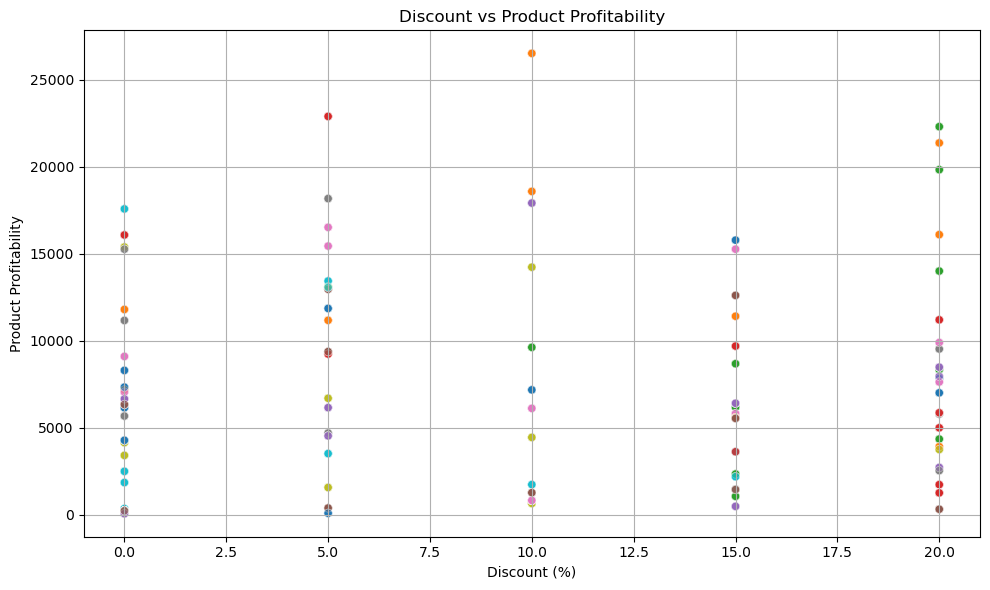

Corelation between Discount and Profitability: -0.01


In [20]:

# Scatter plot: Discount vs Profitability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='ProductProfitability', hue='ProductID', alpha=0.6, palette='tab10', legend=False)
plt.title("Discount vs Product Profitability")
plt.xlabel("Discount (%)")
plt.ylabel("Product Profitability")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation between Discount and Profitability
corr = df[['Discount', 'ProductProfitability']].corr().iloc[0, 1]
print(f"Corelation between Discount and Profitability: {corr:.2f}")


In [21]:
# Thresholds
high_return = 0.5
low_profit = df['TotalProfit'].quantile(0.25)
high_sales = df['QuantitySold'].quantile(0.75)
low_sales = df['QuantitySold'].quantile(0.25)

# Risky products: low profit + high return rate
risky_products = df[(df['TotalProfit'] < low_profit) & (df['ReturnRate'] > high_return)]

# Low margin but popular (might be over-discounted)
low_margin_popular = df[(df['TotalProfit'] < low_profit) & (df['QuantitySold'] > high_sales)]

# High profit but low sales: promote!
underrated_profitable = df[(df['TotalProfit'] > low_profit) & (df['QuantitySold'] < low_sales)]

print("Risky Products (Low Profit + High Returns):", risky_products['ProductID'].unique())
print("Low Margin Popular Product:", low_margin_popular['ProductID'].unique())
print("High-Profit but Low-Sale Products:", underrated_profitable['ProductID'].unique())


Risky Products (Low Profit + High Returns): ['PROD015' 'PROD025' 'PROD066' 'PROD050' 'PROD033' 'PROD086' 'PROD078'
 'PROD032' 'PROD031' 'PROD014' 'PROD067' 'PROD053' 'PROD081' 'PROD096'
 'PROD034' 'PROD070' 'PROD058' 'PROD077' 'PROD059' 'PROD047' 'PROD100'
 'PROD057' 'PROD094' 'PROD087' 'PROD016' 'PROD023' 'PROD036' 'PROD037']
Low Margin Popular Product: []
High-Profit but Low-Sale Products: ['PROD021' 'PROD090' 'PROD054' 'PROD043' 'PROD006' 'PROD073' 'PROD046'
 'PROD010' 'PROD072' 'PROD092' 'PROD056' 'PROD042' 'PROD013' 'PROD089'
 'PROD027' 'PROD060' 'PROD041' 'PROD007' 'PROD039' 'PROD045' 'PROD035'
 'PROD049' 'PROD061' 'PROD064' 'PROD063' 'PROD020' 'PROD024' 'PROD099'
 'PROD074' 'PROD065' 'PROD069' 'PROD068' 'PROD071' 'PROD011' 'PROD040'
 'PROD079' 'PROD002' 'PROD044' 'PROD062' 'PROD029' 'PROD028' 'PROD097'
 'PROD009' 'PROD004' 'PROD075' 'PROD091' 'PROD051' 'PROD085' 'PROD017']


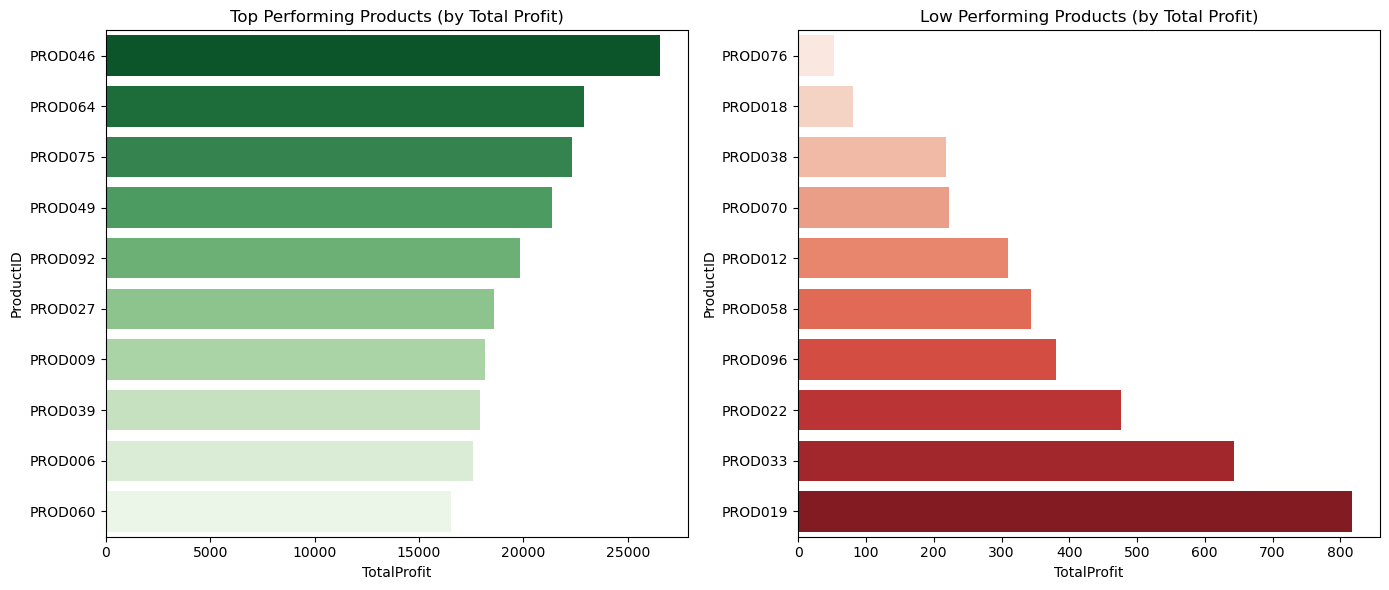

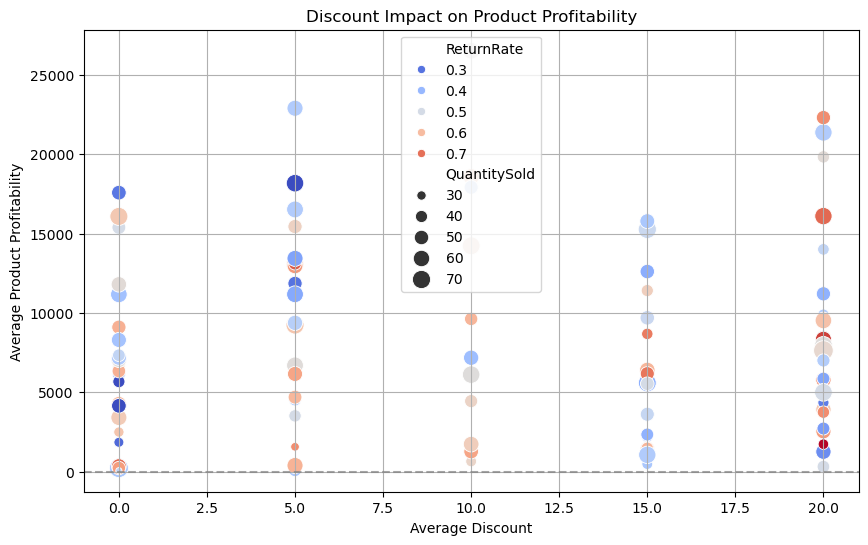

🔍 Products Recommended for Price Re-evaluation or Promotions:

   ProductID  ProductProfitability  ReturnRate  Discount
24   PROD025               1463.70    0.611111      15.0
33   PROD034               2533.40    0.650000      20.0
49   PROD050               1262.25    0.636364      10.0
57   PROD058                343.20    0.705882       0.0
66   PROD067               1560.72    0.666667       5.0
69   PROD070                222.75    0.647059       0.0
76   PROD077               1724.48    0.785714      20.0
95   PROD096                381.06    0.615385       5.0


In [22]:
required_cols = ['ProductID', 'QuantitySold', 'UnitProfit', 'TotalProfit', 
                 'ReturnRate', 'Discount', 'ProductProfitability']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing column: {col}")

# Group data by ProductID
product_summary = df.groupby('ProductID').agg({
    'QuantitySold': 'sum',
    'UnitProfit': 'mean',
    'TotalProfit': 'sum',
    'ReturnRate': 'mean',
    'Discount': 'mean',
    'ProductProfitability': 'mean'
}).reset_index()

# Sort products by performance
top_products = product_summary.sort_values(by='TotalProfit', ascending=False).head(10)
low_products = product_summary.sort_values(by='TotalProfit', ascending=True).head(10)

# Plot top and low-performing products
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='TotalProfit', y='ProductID', data=top_products, palette='Greens_r')
plt.title('Top Performing Products (by Total Profit)')

plt.subplot(1, 2, 2)
sns.barplot(x='TotalProfit', y='ProductID', data=low_products, palette='Reds')
plt.title('Low Performing Products (by Total Profit)')
plt.tight_layout()
plt.show()

# Discount vs Profitability Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='ProductProfitability', hue='ReturnRate', size='QuantitySold',
                sizes=(20, 200), data=product_summary, palette='coolwarm')
plt.title('Discount Impact on Product Profitability')
plt.xlabel('Average Discount')
plt.ylabel('Average Product Profitability')
plt.axhline(0, linestyle='--', color='gray', alpha=0.7)
plt.grid(True)
plt.show()

# Suggest Products for Pricing or Promotions
profit_threshold = product_summary['ProductProfitability'].quantile(0.25)
high_return_threshold = product_summary['ReturnRate'].quantile(0.75)

candidates = product_summary[
    (product_summary['ProductProfitability'] < profit_threshold) & 
    (product_summary['ReturnRate'] > high_return_threshold)
]

print("🔍 Products Recommended for Price Re-evaluation or Promotions:\n")
print(candidates[['ProductID', 'ProductProfitability', 'ReturnRate', 'Discount']])


## Market Trend & Seasonality Analysis:



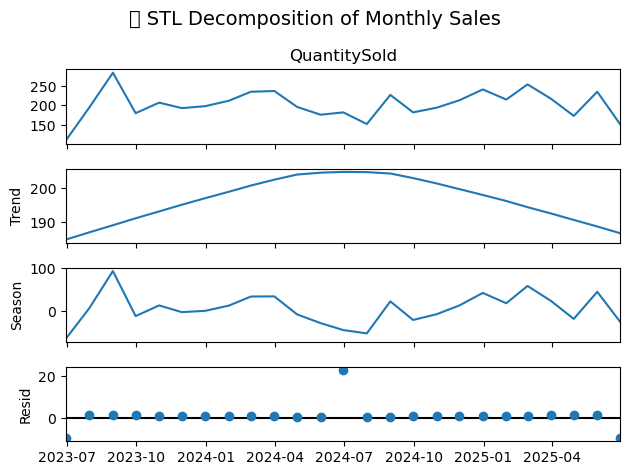

In [23]:
from statsmodels.tsa.seasonal import STL

# date column is in datetime format
df['DateOfSale'] = pd.to_datetime(df['DateOfSale'])

# Aggregate monthly sales
monthly_sales = df.resample('M', on='DateOfSale')['QuantitySold'].sum()

# STL decomposition with seasonal=13
stl = STL(monthly_sales, seasonal=13)
result = stl.fit()

# Plot the decomposition
result.plot()
plt.suptitle("📈 STL Decomposition of Monthly Sales", fontsize=14)
plt.tight_layout()
plt.show()


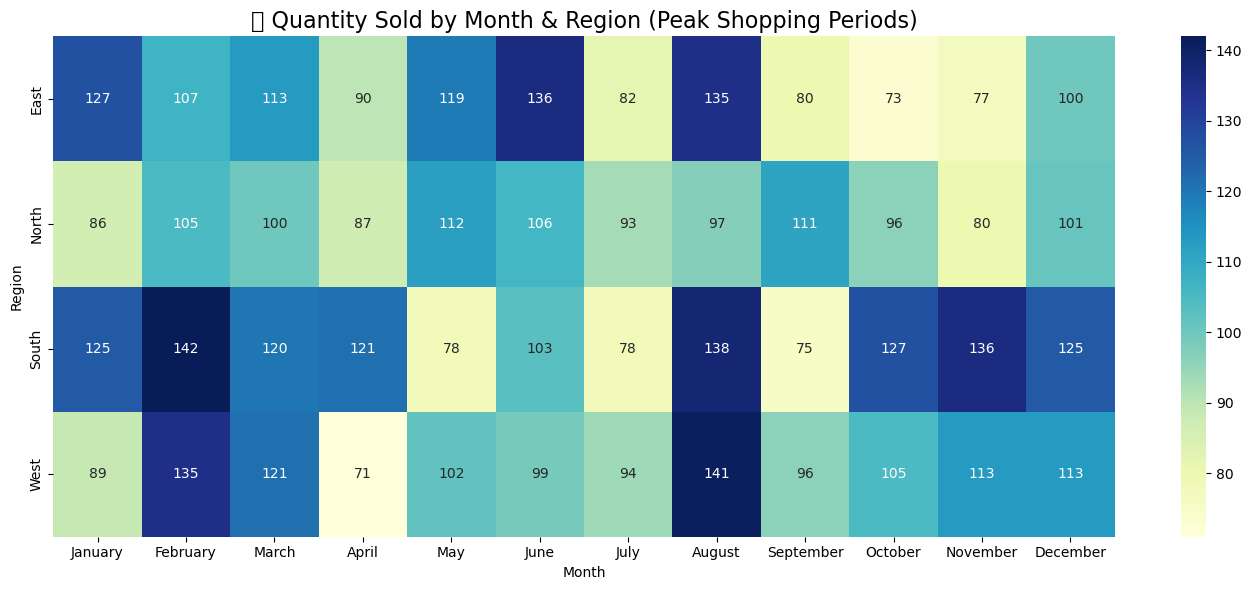

In [24]:

# Extract month and year for aggregation
df['YearMonth'] = df['DateOfSale'].dt.to_period('M')
df['Month'] = df['DateOfSale'].dt.month_name()

# Pivot table: total quantity sold by month and region
heatmap_data = df.pivot_table(
    index='Region',
    columns='Month',
    values='QuantitySold',
    aggfunc='sum'
)

# Reorder months for clarity
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
heatmap_data = heatmap_data[month_order]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("🛍️ Quantity Sold by Month & Region (Peak Shopping Periods)", fontsize=16)
plt.ylabel("Region")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


Engagement Score columns found: ['CustomerEngagementScore']


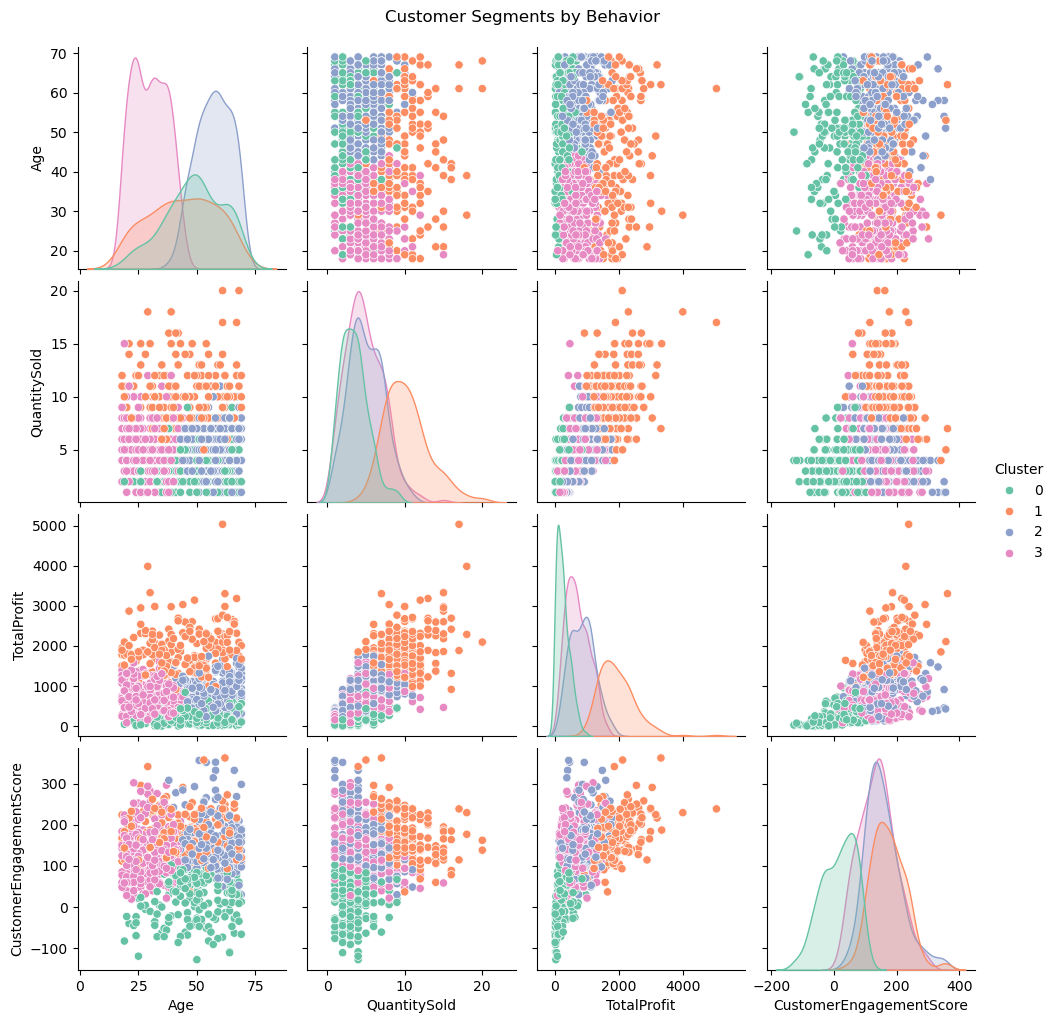

In [25]:

# Check column name variations
engagement_columns = [col for col in df.columns if 'CustomerEngagementScore' in col]
print("Engagement Score columns found:", engagement_columns)

# Choose the correct one:
engagement_col = engagement_columns[0] if engagement_columns else None

# Make sure the column exists before continuing
if engagement_col:
    # Prepare customer data
    customer_data = df[['CustomerID', 'Age', 'Region', 'LoyaltyTier', 'QuantitySold', 'TotalProfit', engagement_col]].copy()

    # Aggregate data per customer
    agg_data = customer_data.groupby('CustomerID').agg({
        'Age': 'mean',
        'QuantitySold': 'sum',
        'TotalProfit': 'sum',
        engagement_col: 'mean'
    }).reset_index()

    # Optional: Normalize numerical data
    scaler = StandardScaler()
    features = ['Age', 'QuantitySold', 'TotalProfit', engagement_col]
    agg_data_scaled = scaler.fit_transform(agg_data[features])

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    agg_data['Cluster'] = kmeans.fit_predict(agg_data_scaled)

    # Visualize clusters
    sns.pairplot(agg_data, hue='Cluster', diag_kind='kde', palette='Set2')
    plt.suptitle("Customer Segments by Behavior", y=1.02)
    plt.show()

else:
    print("No CustomerEngagementScore column found in the dataset.")


## Step 5 Dynamic Pricing Strategy:
## machine learning models to predict optimal pricing.


In [26]:
# making all variable so that i can use in the regression and to fine elasticity

#Filter required columns
pricing_df = df[['SellingPrice', 'QuantitySold', 'Discount', 'Category', 'Region', 'ReturnRate', 'TotalProfit']].copy()

# Drop missing values
pricing_df.dropna(inplace=True)

# One-hot encode categorical variables
pricing_df = pd.get_dummies(pricing_df, columns=['Category', 'Region'], drop_first=True)

# Define features and target
X = pricing_df.drop(['QuantitySold'], axis=1)  # Features
y = pricing_df['QuantitySold']                # Target: quantity sold (proxy for demand)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


R^2 Score: 0.521526799032626
RMSE: 0.7673935456599956


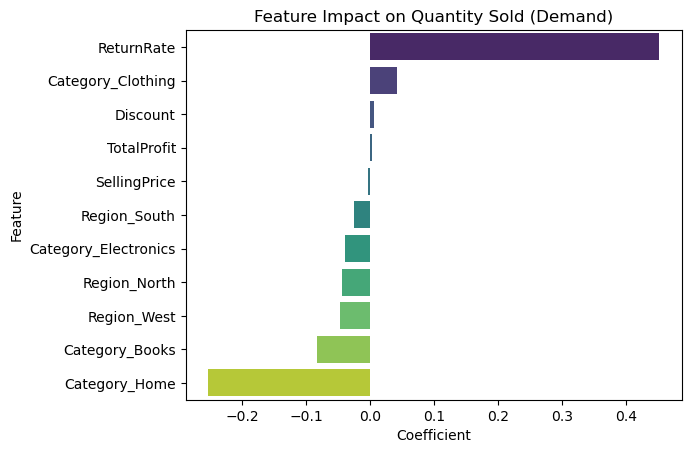

In [27]:
# Fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Feature impact
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')
plt.title("Feature Impact on Quantity Sold (Demand)")
plt.show()


## Analyze elasticity of demand based on price variation and sales performance.

In [28]:
# Get price coefficient
price_coef = coefficients[coefficients['Feature'] == 'SellingPrice']['Coefficient'].values[0]

# Calculate average price and average demand
avg_price = df['SellingPrice'].mean()
avg_demand = df['QuantitySold'].mean()

# Elasticity estimate
elasticity = (price_coef) * (avg_price / avg_demand)
print(f"Estimated Price Elasticity of Demand: {elasticity:.2f}")

# Interpretation
if elasticity < -1:
    print("Demand is elastic – consider reducing price to increase revenue.")
elif elasticity > -1 and elasticity < 0:
    print("Demand is inelastic – raising price may increase revenue.")
else:
    print("Unexpected elasticity result – review feature relationships.")


Estimated Price Elasticity of Demand: -0.62
Demand is inelastic – raising price may increase revenue.


## Step 6: Marketing Analysis & Campaign Optimization:
## Evaluate marketing campaign performance using conversion data.


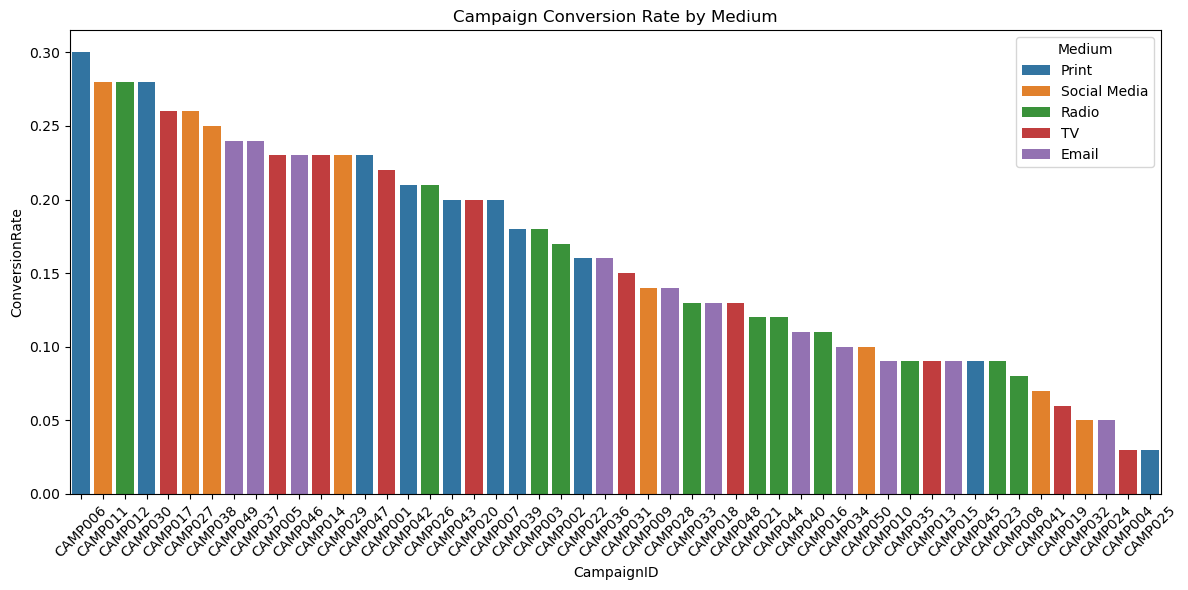

In [29]:
# Group by campaign and medium
campaign_performance = df.groupby(['CampaignID', 'Medium']).agg({
    'ConversionRate': 'mean',
    'CustomerReach': 'sum'
}).reset_index()

# Sort by highest conversion
campaign_performance = campaign_performance.sort_values(by='ConversionRate', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=campaign_performance, x='CampaignID', y='ConversionRate', hue='Medium')
plt.title('Campaign Conversion Rate by Medium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## A/B Testing Simulation (Based on Conversion Rate)


In [30]:
# Simulated A/B testing for a campaign (replace with actual CampaignID if needed)
ab_test = df[df['CampaignID'] == 'CMP001']  # example
group_a = ab_test[ab_test['Medium'] == 'Email']['ConversionRate']
group_b = ab_test[ab_test['Medium'] == 'Social']['ConversionRate']

# Welch's t-test (does not assume equal variance)
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(group_a, group_b, equal_var=False, nan_policy='omit')
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Statistically significant difference between mediums (A/B groups)")
else:
    print("No significant difference between A/B groups")


T-statistic: nan, P-value: nan
No significant difference between A/B groups


In [31]:
# Aggregate customer-level marketing performance
marketing_targets = df.groupby('CustomerID').agg({
    'CustomerEngagementScore': 'mean',
    'ConversionRate': 'mean',
    'CustomerReach': 'mean'
}).reset_index()

# Define high-potential customers: high engagement, high reach, but low conversion
potential_customers = marketing_targets[
    (marketing_targets['CustomerEngagementScore'] > marketing_targets['CustomerEngagementScore'].median()) &
    (marketing_targets['CustomerReach'] > marketing_targets['CustomerReach'].median()) &
    (marketing_targets['ConversionRate'] < marketing_targets['ConversionRate'].median())
]

print("High-potential customer count:", len(potential_customers))

# View sample
potential_customers.head()


High-potential customer count: 130


CustomerID  CustomerEngagementScore  ConversionRate  CustomerReach
5    CUST0007                  184.416          0.1350         8136.0
9    CUST0011                  150.020          0.1550         4832.0
16   CUST0019                  140.531          0.1325         6482.5
21   CUST0025                  362.626          0.1150         7732.5
25   CUST0029                  193.204          0.1350         4961.5

## Step 7 Visualization 


## 1. Sales Trends – Interactive Line Chart

In [32]:
import plotly.express as px

# Ensure dates are datetime
df['DateOfSale'] = pd.to_datetime(df['DateOfSale'])

# Aggregate sales by month
monthly_sales = df.resample('M', on='DateOfSale')['QuantitySold'].sum().reset_index()

# Plot
fig = px.line(monthly_sales, x='DateOfSale', y='QuantitySold',
              title='Monthly Sales Trend',
              labels={'QuantitySold': 'Total Quantity Sold', 'DateOfSale': 'Month'},
              markers=True)
fig.update_layout(xaxis_title='Month', yaxis_title='Units Sold')
fig.show()


## Product Profitability Heatmap by Category & Subcategory

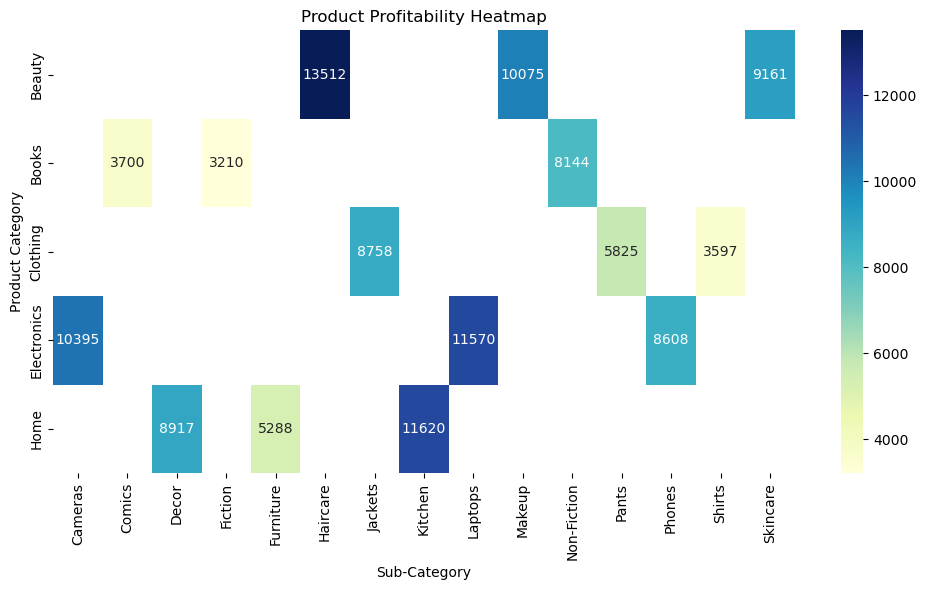

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate profitability
profit_heatmap_data = df.groupby(['Category', 'SubCategory'])['ProductProfitability'].mean().unstack()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(profit_heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Product Profitability Heatmap")
plt.ylabel("Product Category")
plt.xlabel("Sub-Category")
plt.tight_layout()
plt.show()


## Customer segment behavior

In [34]:
# Count of customers by Region & LoyaltyTier
segment_counts = df.groupby(['Region', 'LoyaltyTier'])['CustomerID'].nunique().reset_index()

# Plot
fig = px.bar(segment_counts, x='Region', y='CustomerID', color='LoyaltyTier',
             barmode='group',
             title='Customer Segmentation: Region vs Loyalty Tier',
             labels={'CustomerID': 'Unique Customers'})
fig.show()


#### Marketing ROI

In [35]:
# Calculate Marketing ROI: (TotalProfit / Campaign Reach)
campaign_roi = df.groupby('CampaignID').agg({
    'TotalProfit': 'sum',
    'CustomerReach': 'sum'
}).reset_index()
campaign_roi['MarketingROI'] = campaign_roi['TotalProfit'] / campaign_roi['CustomerReach']

# Bar plot
fig = px.bar(campaign_roi, x='CampaignID', y='MarketingROI',
             title='Marketing ROI by Campaign',
             labels={'MarketingROI': 'ROI (₹ per customer)'})
fig.show()


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse, 2))
print("Mean Absolute Error (MAE):", round(mae, 2))
print("R² Score (Coefficient of Determination):", round(r2, 4))


Mean Squared Error (MSE): 0.59
Mean Absolute Error (MAE): 0.61
R² Score (Coefficient of Determination): 0.5215


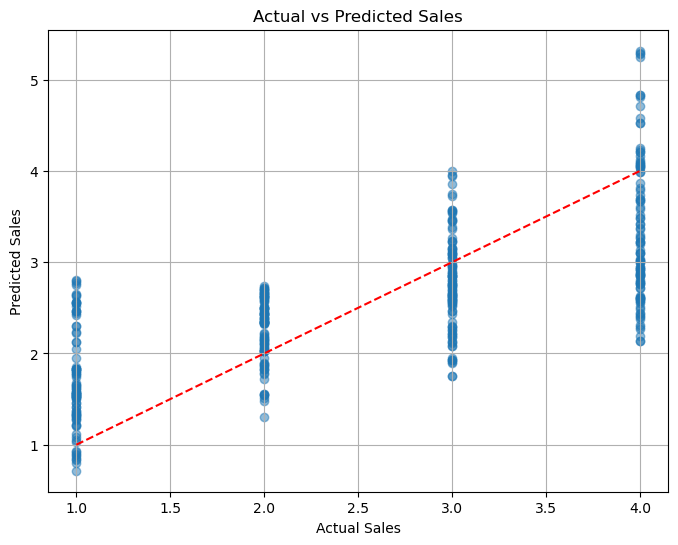

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()


##  For Regression (e.g., LinearRegression):
## Actual vs Predicted Plot

## Residual Plot

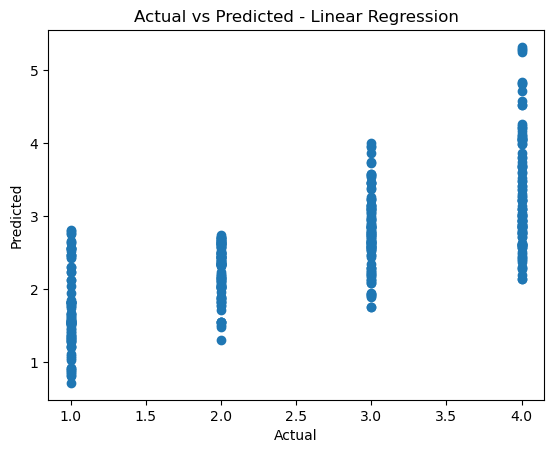

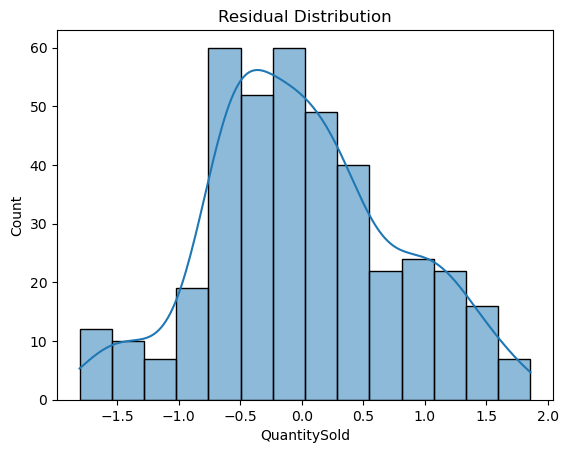

In [40]:
# Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

# Residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


##  For Clustering (e.g., KMeans):
## Cluster Visualization (2D/3D)

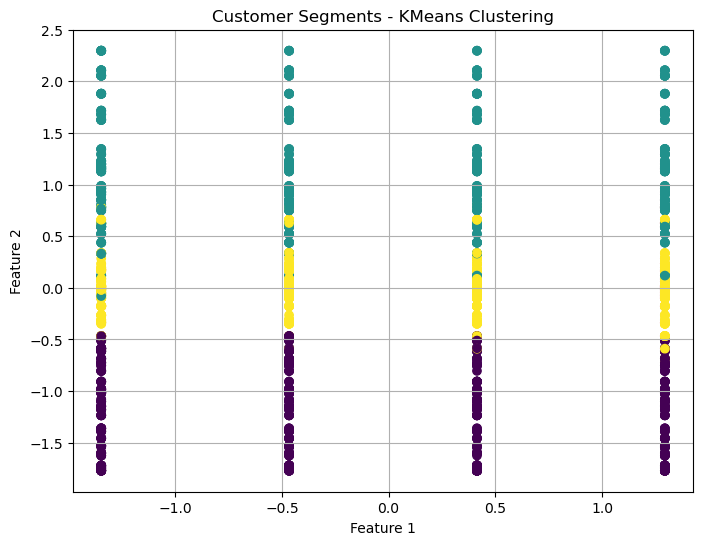

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv(r'C:\Users\Sidhesh Salunke\Downloads\combined_customer_sales_marketing_data.csv')

# Drop non-numeric or unneeded columns
data = df.select_dtypes(include=['float64', 'int64']).dropna()

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame (optional)
df['Cluster'] = clusters

# Plot 2D cluster visualization using first two principal features
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title("Customer Segments - KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
